### **Importing Libraries**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Loading and Viewing Dataset**

In [88]:
df = pd.read_csv("/content/pre-owned cars.csv")

print(df.head(3))

      brand                                     model transmission  make_year  \
0  Mahindra              Thar LX D 4WD MT CONVERTIBLE       Manual     2020.0   
1   Hyundai                         Verna 1.6 VTVT SX       Manual     2018.0   
2      Tata  Harrier XT PLUS 2.0L KRYOTEC DARK EDITON       Manual     2022.0   

     reg_year fuel_type  engine_capacity(CC)  km_driven  ownership    price  \
0  01-01-2021    Diesel               2184.0    11003.0  1st owner  1231000   
1  01-07-2018    Petrol               1591.0    66936.0  1st owner   786000   
2  01-08-2022    Diesel               1956.0    27990.0  1st owner  1489000   

   overall_cost has_insurance spare_key reg_number  \
0       23431.0          True        No       HR26   
1       15359.0          True        No       DL7C   
2       28349.0          True        No       HR29   

                                               title  
0         2020 Mahindra Thar LX D 4WD MT CONVERTIBLE  
1                     2018 Hyun

### **Initial Data Overview**

In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

Number of rows = 2806<br>
Number of columns = 15<br><r>
dtypes: float64(**4**), int64(**1**), object(**10**)<br>
Column with no Null entry: **price**<br>
Column with max Null entries: **reg_year**


### **Understanding Data**

In [90]:
print(df.describe())
print('\n\n')
print(df.isnull().sum())

         make_year  engine_capacity(CC)      km_driven         price  \
count  2805.000000          2688.000000    2805.000000  2.806000e+03   
mean   2018.181105          1259.027530   49215.477362  1.342522e+06   
std       2.945293           254.504798   26626.932696  3.554669e+07   
min    2010.000000           624.000000     450.000000  1.630000e+05   
25%    2016.000000          1194.000000   28540.000000  4.350000e+05   
50%    2018.000000          1197.000000   45695.000000  5.940000e+05   
75%    2021.000000          1462.000000   68182.000000  8.140000e+05   
max    2024.000000          2694.000000  143991.000000  1.883558e+09   

       overall_cost  
count   2805.000000  
mean   13495.022816  
std     6040.809220  
min     4039.000000  
25%     9267.000000  
50%    12145.000000  
75%    15760.000000  
max    47338.000000  



brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2086
fuel_type 

#### **make_year**
make_year has **1 missing** entry.<br>
make_year ranges from **2010** to **2024**. (14 years)<br>
Both median and mean of make_year is **2018** indicating that **most of the cars** have been manufactured over past **5-6 years only that is they are new**.<br>
25% of cars were manufactured **before 2016** and 25% **after 2021**, indicating a mix of old and new cars in the dataset.

> The dataset is skewed towards **newer cars**.



#### **engine_capacity(CC)**
This column has **118 missing** entries.<br>
Engine capacities range from **624 CC to 2694 CC**. (2000 CC)<br>
The median engine capacity is 1197 CC and only 25% of cars have engine capacity above 1462 CC which indicates that **most of the cars have small to mid sized engine capacity** only.<br>
Very **few cars have high engine capacity**.<br>
An Indian car  has an **average engine capacity of 1300 CC**.

> Dataset mostly covers **everyday cars** with not much large engine capacity.



#### **km_driven**
This column has **1 missing** entry.<br>
Cars have been driven anywhere between **450 km and 143,991 km.** (Outlier)<br>
Average distance travelled by an indian car is **50,000 km.**<br>
Most of cars have km_driven from **28,000 km to 68,000 km** indicating **moderate mileage**.<br>
Only 25% of cars have km_driven **above 68,000 km**.<br>

> Cars in the dataset have **decent km_driven** indicating **moderate mileage.**

#### **price**
No missing entry.<br>
Prices range from **Rs.1,63,000  to  Rs.18 crores** (this is an extreme upper value, an outlier).<br>
Average price of an Indian car is **Rs.13,42,522**.<br>
50% of the cars cost below **Rs.5,94,000** in Indian market.Only 25% of cars cost above **Rs. 8,14,000**.

> There is an **outlier in price** that needs to be removed. **Most of the cars cost below Rs. 6 lakhs.**

#### **overall_cost**
This column has **1 missing** entry.<br>
overall_cost ranges from **Rs.4000 to Rs.47000**.
Only **25% of the cars have overall cost above Rs.15000**.

> Most cars have **reasonable overall cost**. Only few cars cost might be the are older or high maintenance cars.




### **Data Cleaning and Preprocessing**



<Axes: >

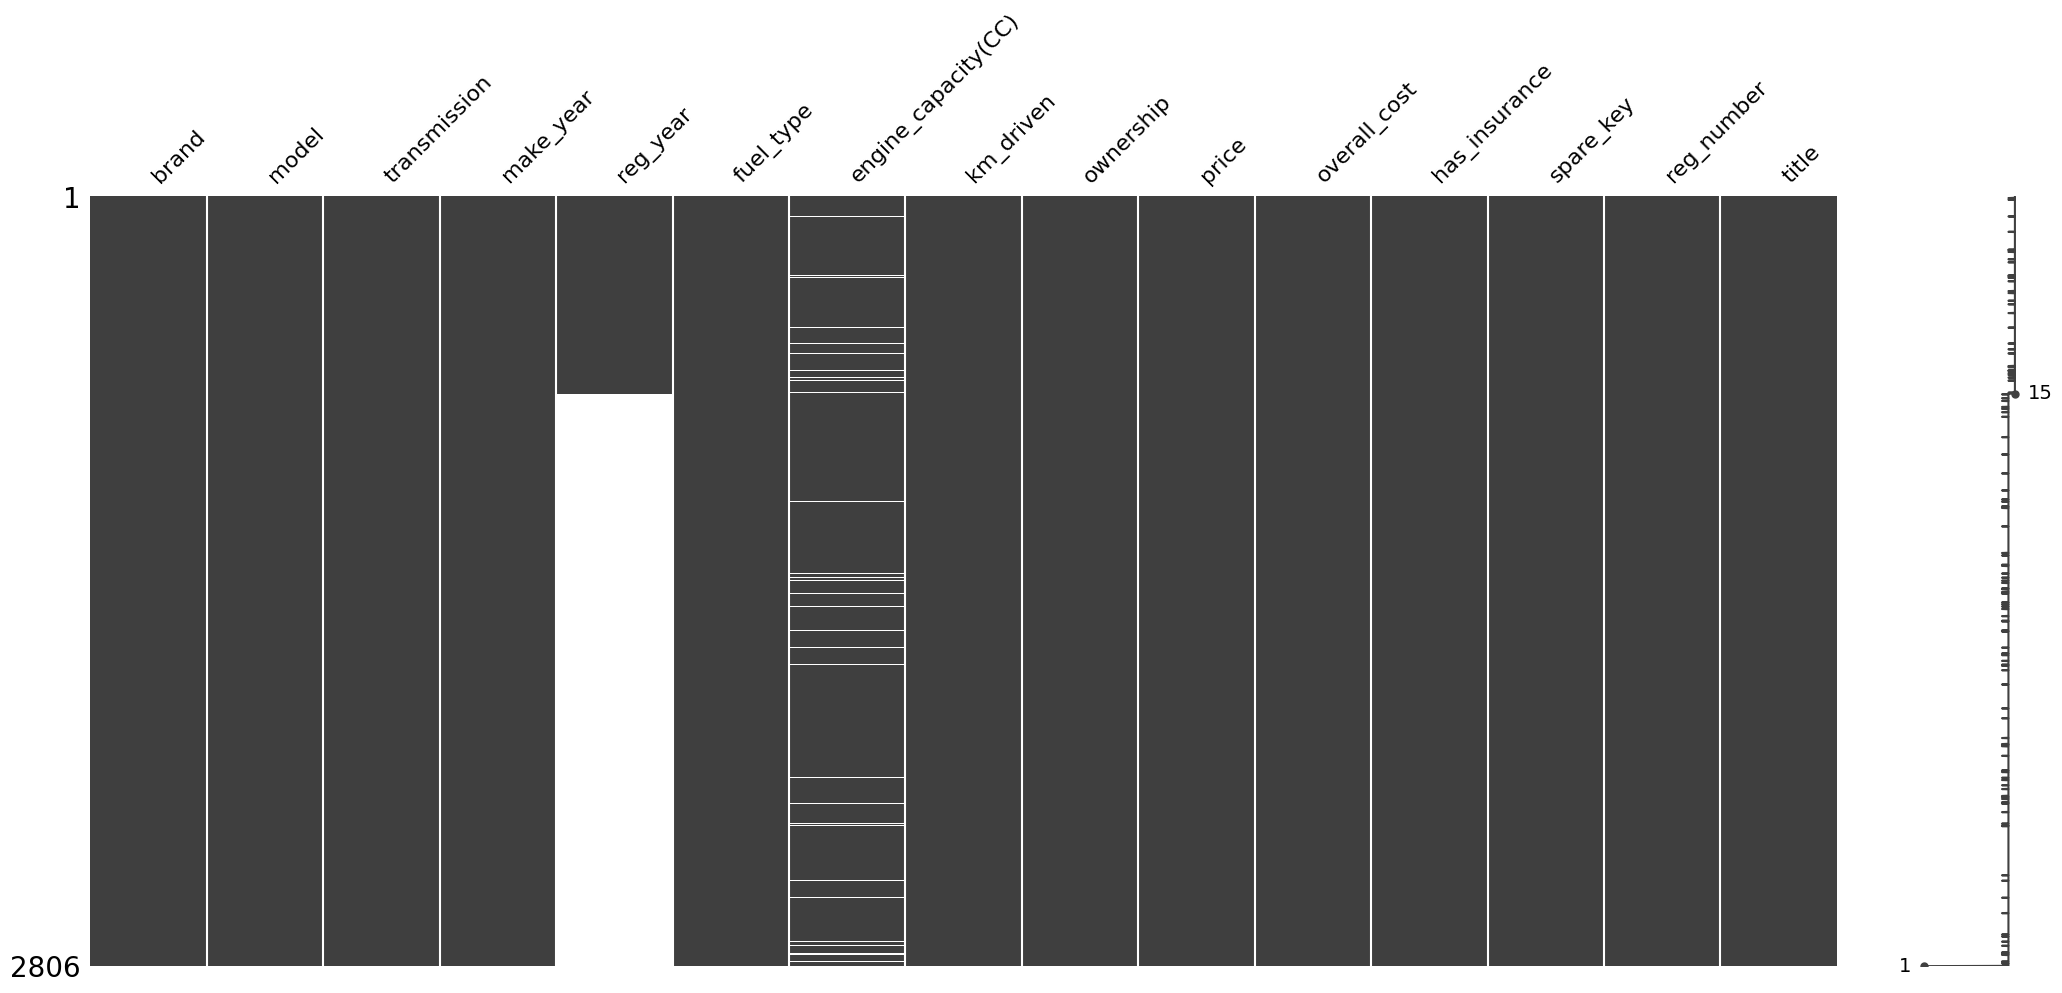

In [91]:
import missingno as msno
msno.matrix(df)

In [92]:
# reg_year is ~75% missing; unless you can reliably extract it from title/registration number, drop it:
df.drop(columns=['reg_year'], inplace=True)

# Columns won’t be use directly in modeling:
df.drop(columns=['reg_number','title'], inplace=True)

In [93]:
# 118 missing. Let’s fill with median capacity of its brand-model group:
df['engine_capacity(CC)'] = (
    df
    .groupby(['brand','model'])['engine_capacity(CC)']
    .transform(lambda grp: grp.fillna(grp.median()))
)

# If any still missing (for singleton groups), fill with overall median:
df['engine_capacity(CC)'] = df['engine_capacity(CC)'].fillna(df['engine_capacity(CC)'].median())


In [94]:
# make_year: only 1 missing — fill with the mode (most common year)
df['make_year'] = df['make_year'].fillna(df['make_year'].mode()[0])

# km_driven: 1 missing — fill with median km_driven
df['km_driven'] = df['km_driven'].fillna(df['km_driven'].median())

In [95]:
# Categorical columns
df['brand']         = df['brand'].fillna(df['brand'].mode()[0])
df['model']         = df['model'].fillna(df['model'].mode()[0])
df['transmission']  = df['transmission'].fillna(df['transmission'].mode()[0])
df['fuel_type']     = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['ownership']     = df['ownership'].fillna(df['ownership'].mode()[0])

# Numerical column
df['overall_cost']  = df['overall_cost'].fillna(df['overall_cost'].median())

# Boolean-like columns
df['has_insurance'] = df['has_insurance'].fillna(df['has_insurance'].mode()[0])
df['spare_key']     = df['spare_key'].fillna(df['spare_key'].mode()[0])


/tmp/ipython-input-95-3081725151.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_insurance'] = df['has_insurance'].fillna(df['has_insurance'].mode()[0])


In [96]:
print(df.isnull().sum())

brand                  0
model                  0
transmission           0
make_year              0
fuel_type              0
engine_capacity(CC)    0
km_driven              0
ownership              0
price                  0
overall_cost           0
has_insurance          0
spare_key              0
dtype: int64


In [97]:
# outlier capping function
def cap_outliers_iqr(series, feature_name="Feature"):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    capped_series = series.clip(lower, upper)

    num_lower_capped = (series < lower).sum()
    num_upper_capped = (series > upper).sum()

    print(f"[{feature_name}]")
    print(f"   Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"   Values Capped at Lower Bound: {num_lower_capped}")
    print(f"   Values Capped at Upper Bound: {num_upper_capped}")
    print(f"   Total Values Capped: {num_lower_capped + num_upper_capped}\n")

    return capped_series


# Capping outliers for continuous features
df['price']                = cap_outliers_iqr(df['price'])
df['km_driven']            = cap_outliers_iqr(df['km_driven'])
df['engine_capacity(CC)']  = cap_outliers_iqr(df['engine_capacity(CC)'])
df['overall_cost']         = cap_outliers_iqr(df['overall_cost'])

# creating age column
CURRENT_YEAR = 2025
df['age'] = CURRENT_YEAR - df['make_year'].astype(int)
df['age'] = cap_outliers_iqr(df['age'])


[Feature]
   Lower Bound: -133500.00, Upper Bound: 1382500.00
   Values Capped at Lower Bound: 0
   Values Capped at Upper Bound: 143
   Total Values Capped: 143

[Feature]
   Lower Bound: -30875.38, Upper Bound: 127609.62
   Values Capped at Lower Bound: 0
   Values Capped at Upper Bound: 1
   Total Values Capped: 1

[Feature]
   Lower Bound: 791.62, Upper Bound: 1862.62
   Values Capped at Lower Bound: 1
   Values Capped at Upper Bound: 107
   Total Values Capped: 108

[Feature]
   Lower Bound: -471.25, Upper Bound: 25498.75
   Values Capped at Lower Bound: 0
   Values Capped at Upper Bound: 168
   Total Values Capped: 168

[Feature]
   Lower Bound: -3.50, Upper Bound: 16.50
   Values Capped at Lower Bound: 0
   Values Capped at Upper Bound: 0
   Total Values Capped: 0



In [98]:
df.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost,age
count,2806.000000,2806.000000,2806.000000,2.806000e+03,2806.000000,2806.000000
mean,2018.180684,1248.546507,49208.384756,6.604257e+05,13227.480756,6.819316
std,2.944852,228.148580,26603.267293,2.981500e+05,5279.991574,2.944852
min,2010.000000,791.625000,450.000000,1.630000e+05,4039.000000,1.000000
25%,2016.000000,1193.250000,28556.500000,4.350000e+05,9267.500000,4.000000
50%,2018.000000,1197.000000,45695.000000,5.940000e+05,12145.000000,7.000000
75%,2021.000000,1461.000000,68177.750000,8.140000e+05,15760.000000,9.000000
max,2024.000000,1862.625000,127609.625000,1.382500e+06,25498.750000,15.000000


**`price`**

  * **Max reduced** from **₹18.83 Cr** to **₹13.82 Lakhs** (huge outlier removed).
  * **Mean dropped** from ₹13.4 Lakhs to ₹6.6 Lakhs (more realistic average).
  * **Std dev reduced** significantly, indicating lower spread.
---

**`km_driven`**

  * **Max reduced** from \~144k km to \~127k km (upper mileage capped).
  * Distribution is now tighter around the average (\~49k km).
---

**`engine_capacity(CC)`**

  * **Max dropped** from 2694 to \~1863 CC (only normal-sized engines retained).
  * Better reflects typical Indian car engines.
---

**`overall_cost`**

  * **Max capped** from ₹47k to ₹25.5k (unusually high maintenance costs trimmed).
  * Smoother cost distribution.
---
**`age`**

  * Max now 15 years (derived from capped make\_year); older cars adjusted.
---

**Overall**, the data is now **cleaner, realistic, and less skewed**, which will help our model train better without extreme noise.


### **Exploratory Data Analysis**

Text(0, 0.5, 'Count')

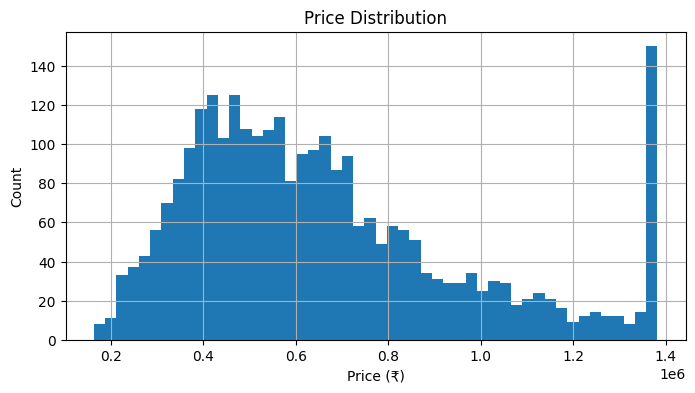

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df['price'].hist(bins=50)
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Count')

Price Distribution of Pre-Owned Cars shows that:

- Most cars are priced between ₹3.5 lakhs and ₹6.5 lakhs, indicating this is the most common price range in the Indian pre-owned car market.

- There is a gradual decline in the number of cars as the price increases beyond ₹6.5 lakhs.

- A sharp spike near ₹13.8 lakhs suggests a potential upper capping applied during outlier treatment.

- The distribution is right-skewed, meaning there are fewer high-priced cars and a concentration of vehicles in the affordable to mid-range segments.

- Skewness = 0.90. This is slightly right-skewed but less than 1, so log-transform is not necessary.

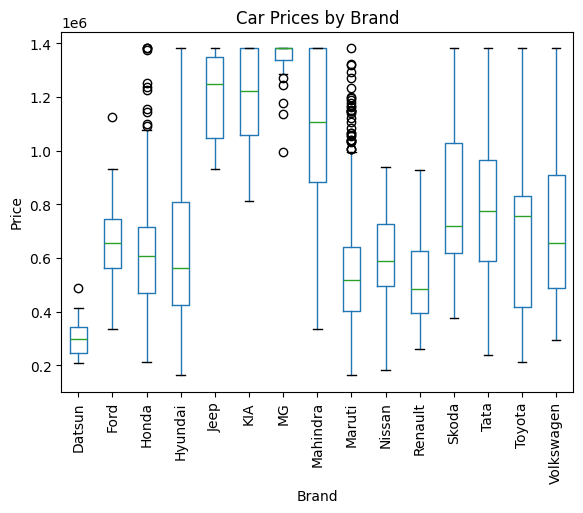

In [100]:
df.boxplot(column='price', by='brand', grid=False)
plt.xticks(rotation=90)
plt.title('Car Prices by Brand')
plt.suptitle('')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

**`Datsun` has the smallest price range** cars, representing entry-level, budget cars.
While **`Mahindra` has highest price range**.<br>

**`Jeep`, `KIA`, `MG`, `Mahindra`** have **high median prices** indicating **50% of their cars are in high price range.** Thus, these are **premium brands.**<br>
**`Maruti` has maximum outliers** i.e. cars that are out of their normal price range.<br>
**`Volkswagen`, `Skoda`, `Tata`, `Mahindra` and `Hyundai`** have a larger variability in car prices. This means they likely **sell both cheaper and more expensive models** in the pre-owned market.

brand
Maruti        926
Hyundai       660
Honda         276
Tata          240
Renault       167
KIA           116
Mahindra      114
Ford           64
Volkswagen     53
Nissan         38
MG             37
Toyota         36
Datsun         34
Skoda          33
Jeep           12
Name: count, dtype: int64


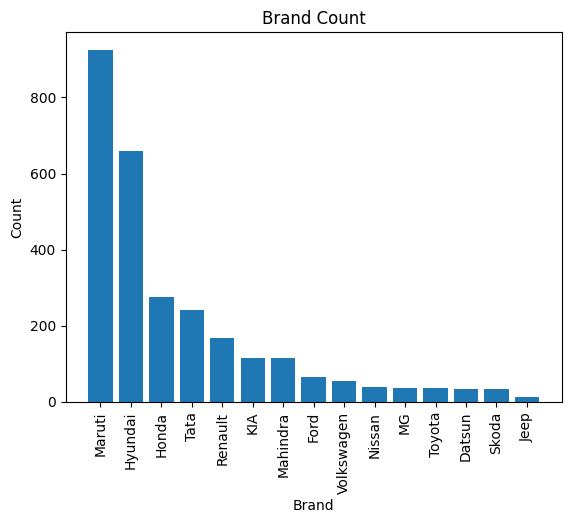

In [101]:
print(df['brand'].value_counts())
plt.bar(df['brand'].value_counts().index, df['brand'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Brand Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

This gives us list of brands we have and number of cars for each brand in the dataset.<br>
We have maximum cars of **Maruti** in the dataset.<br>
We have minimum cars of **Jeep** in the dataset.

fuel_type
Petrol      2374
Diesel       318
CNG          110
Electric       4
Name: count, dtype: int64


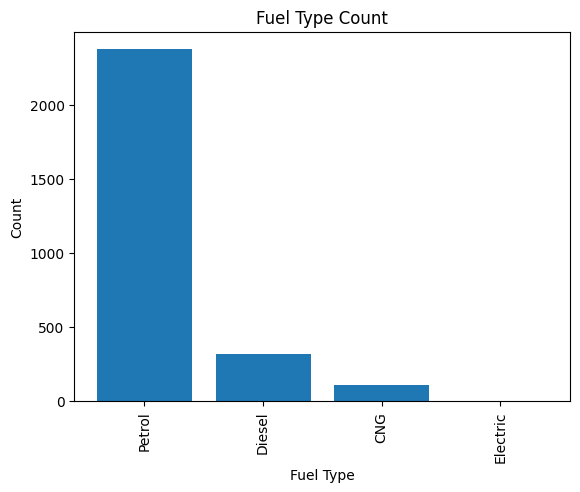

In [102]:
print(df['fuel_type'].value_counts())
plt.bar(df['fuel_type'].value_counts().index, df['fuel_type'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Most of the cars are run on **petrol**, then **diesel** and then **CNG**.<br>
There are only **4 electric cars** in the dataset.

transmission
Manual       68.663102
Automatic    31.372549
Name: count, dtype: float64 



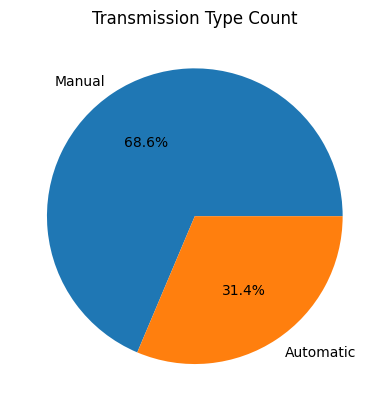

In [103]:
print((df['transmission'].value_counts())/2805*100,'\n')
plt.pie(df['transmission'].value_counts(), labels=df['transmission'].value_counts().index, autopct='%1.1f%%')
plt.title('Transmission Type Count')
plt.show()

**68% of cars are manual** and rest are automatic indicating **automatic cars are not much popular** in Indian market yet.

ownership
1st owner    72.941176
2nd owner    25.383244
3rd owner     1.711230
Name: count, dtype: float64 



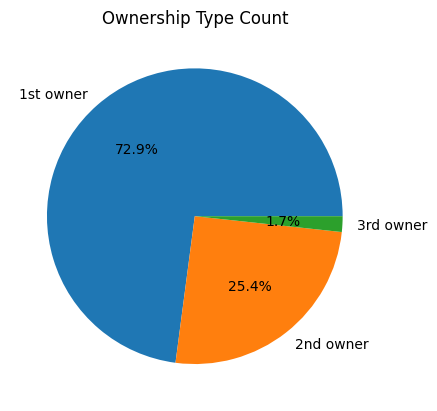

In [104]:
print((df['ownership'].value_counts())/2805*100, '\n')
plt.pie(df['ownership'].value_counts(), labels=df['ownership'].value_counts().index, autopct='%1.1f%%')
plt.title('Ownership Type Count')
plt.show()


**72.9% of the cars** are owned by **first owners**, indicating a strong presence of **newer, well-maintained cars** in the market.<br>
**25.4%** are owned by **second owners**, suggesting that many cars sold at least once, there are **many potential buyers for old cars** in Indian market.<br>
Only **1.7%** are owned by third owners, indicating that there are not many buyers for second-hand cars.

has_insurance
True    100.035651
Name: count, dtype: float64 



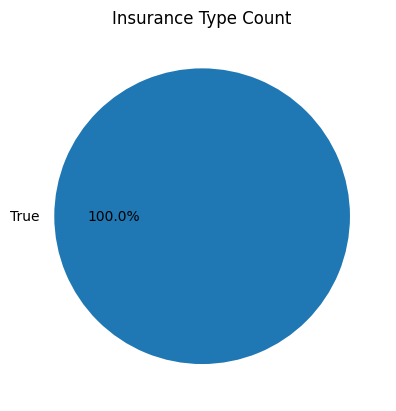

In [105]:
print((df['has_insurance'].value_counts())/2805*100, '\n')
plt.pie(df['has_insurance'].value_counts(), labels=df['has_insurance'].value_counts().index, autopct='%1.1f%%')
plt.title('Insurance Type Count')
plt.show()

**All the cars** in the dataset **has a car insurance** indicating responsible ownership among car owners. This feature will not contribute to price prediction, so can be removed.

spare_key
No     73.190731
Yes    26.844920
Name: count, dtype: float64 



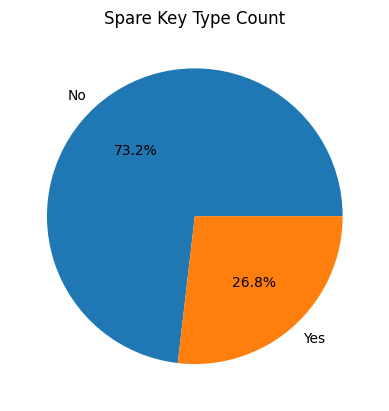

In [106]:
print((df['spare_key'].value_counts())/2805*100, '\n')
plt.pie(df['spare_key'].value_counts(), labels=df['spare_key'].value_counts().index, autopct='%1.1f%%')
plt.title('Spare Key Type Count')
plt.show()

**26.8% of the cars** do come with a **spare key**. Having a car spare key is not much common in India.

<Figure size 200x100 with 0 Axes>

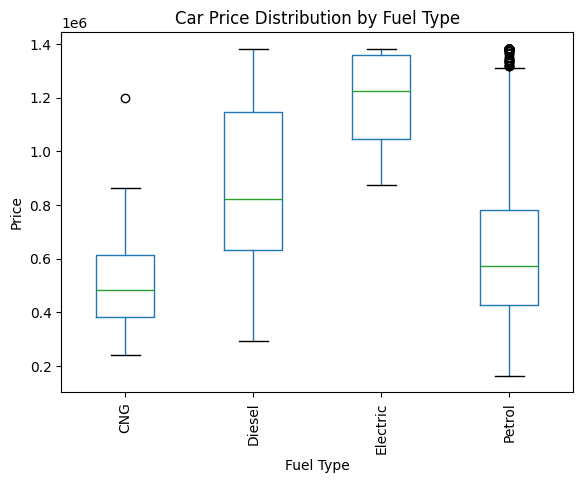

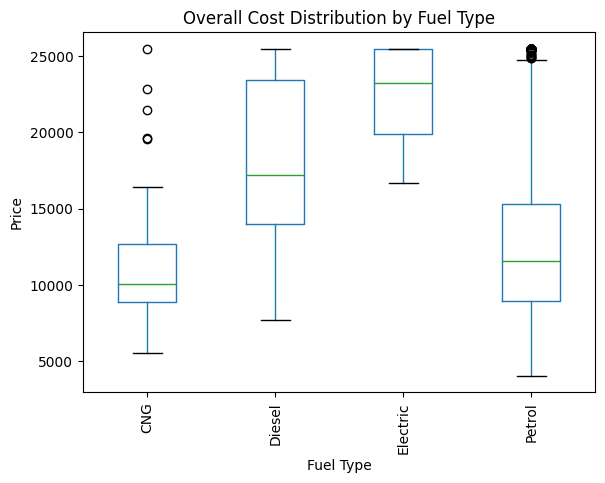

In [107]:
plt.figure(figsize=(2,1))
df.boxplot(column='price', by='fuel_type', grid=False)
plt.xticks(rotation=90)
plt.title('Car Price Distribution by Fuel Type')
plt.suptitle('')
plt.ylabel('Price')
plt.xlabel('Fuel Type')

df.boxplot(column='overall_cost', by='fuel_type', grid=False)
plt.xticks(rotation=90)
plt.title('Overall Cost Distribution by Fuel Type')
plt.suptitle('')
plt.ylabel('Price')
plt.xlabel('Fuel Type')
plt.show()

**Electric cars are the most expensive** and have narrow price range.<br>
**Diesel and Petrol** cars have the **widest range** in price, with some luxury models causing outliers.<br>
**CNG and Petrol cars** are on the **more affordable** side, with CNG being the least expensive option.

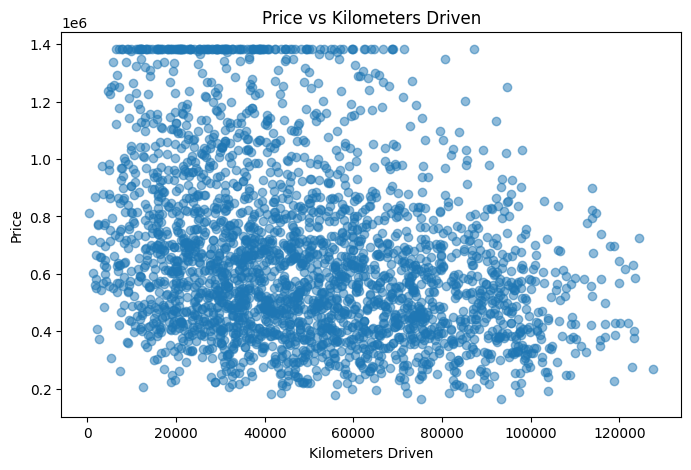

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(df['km_driven'], df['price'], alpha=0.5)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

There appears to be a **weakly negative correlation** between **price and kilometers driven**. This suggests that, generally, **cars with higher mileage tend to have lower prices**. However, other factors also play a role, and individual variations exist.

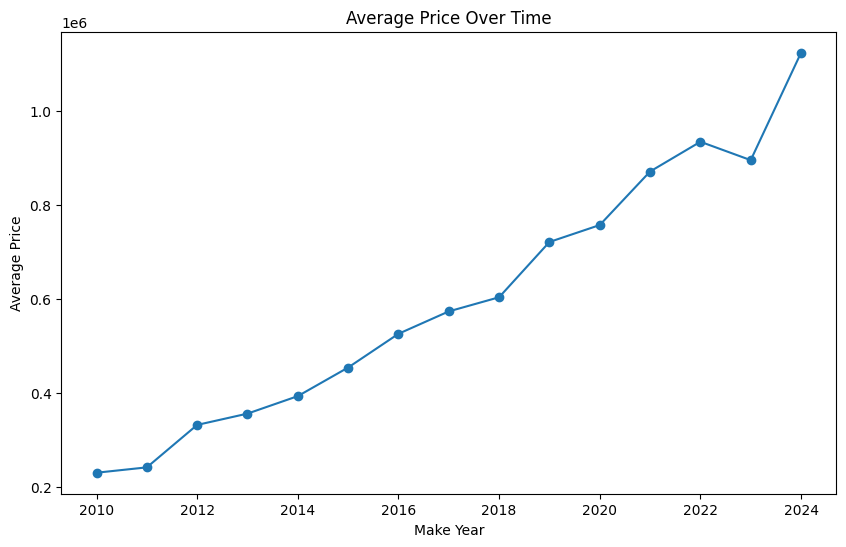

In [109]:
plt.figure(figsize=(10,6))
df_grouped = df.groupby('make_year')['price'].mean().reset_index()

plt.plot(df_grouped['make_year'], df_grouped['price'], marker='o', linestyle='-')

plt.title('Average Price Over Time')
plt.xlabel('Make Year')
plt.ylabel('Average Price')

plt.show()


The average price has consistently **increased year over year**, with a significant jump in 2024. There are no periods of significant price decline, indicating a general upward trajectory.

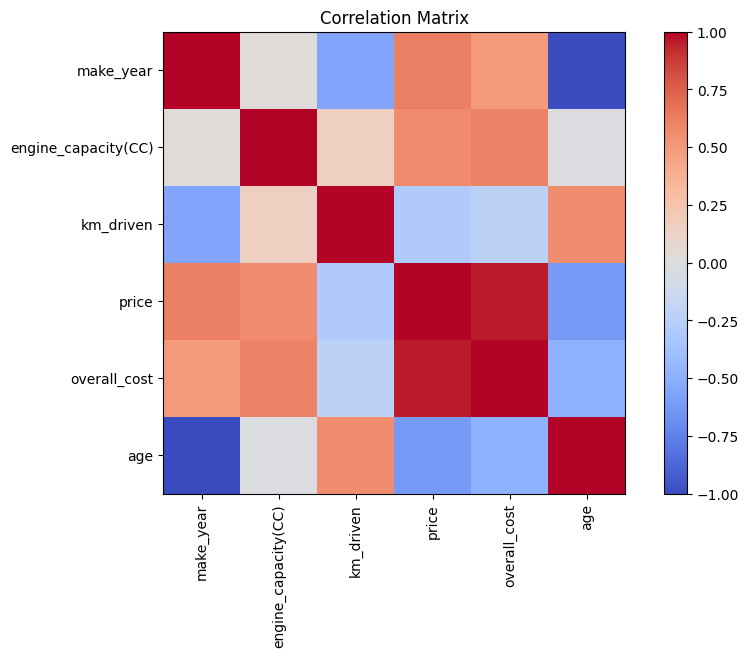

In [110]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10,6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()


**Positive Correlations:**

* **make_year and price:** Strong positive correlation — newer cars tend to cost more, which is expected.
* **engine_capacity(CC) and price:** Moderate correlation — larger engines are generally found in higher-priced vehicles.
* **overall_cost and price:** Strong positive relation, expensive cars have more overall costs.

**Negative Correlation:**

* **km_driven and price:** Mild to moderate negative correlation — cars with higher mileage are typically priced lower.
* **age and price:** Strongly negative — older cars depreciate in value over time (as expected), showing a mirror trend of make_year.

**Weak or No Correlation:**

* **engine_capacity(CC) and make_year:** Newer cars (make_year) do not necessarily have higher or lower engine capacities.

The diagonal elements represent the correlation of a variable with itself, which is always 1.

In [111]:
!pip install catboost

### **Feature Engineering**


In [112]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2806 non-null   object 
 1   model                2806 non-null   object 
 2   transmission         2806 non-null   object 
 3   make_year            2806 non-null   float64
 4   fuel_type            2806 non-null   object 
 5   engine_capacity(CC)  2806 non-null   float64
 6   km_driven            2806 non-null   float64
 7   ownership            2806 non-null   object 
 8   price                2806 non-null   int64  
 9   overall_cost         2806 non-null   float64
 10  has_insurance        2806 non-null   bool   
 11  spare_key            2806 non-null   object 
 12  age                  2806 non-null   int64  
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 265.9+ KB


In [114]:
# Drop unused features
df = df.drop(['make_year', 'has_insurance', 'overall_cost'], axis=1) # overall cost is difficult to estimate in real world scenarios
df['spare_key'] = df['spare_key'].map({'Yes': 1, 'No': 0})  # Encode spare_key

In [115]:
# Split target and features
X = df.drop('price', axis=1)
y = df['price']

In [116]:
# Split early to avoid leakage
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [117]:
# For CatBoost (raw data)
X_train_catboost = X_train_full.copy()
X_test_catboost = X_test_full.copy()

# For Other Models (encoded & scaled)
X_train = X_train_full.copy()
X_test = X_test_full.copy()

In [118]:
# Target encoding for 'model'
X_train['model_te'] = np.nan
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_te_mapping = {}
brand_te_mapping = {}
global_mean = y_train.mean()

for train_idx, val_idx in kf.split(X_train):
    fold_means_model = y_train.iloc[train_idx].groupby(X_train.iloc[train_idx]['model']).mean()
    fold_means_brand = y_train.iloc[train_idx].groupby(X_train.iloc[train_idx]['brand']).mean()

    model_te_mapping.update(fold_means_model.to_dict())
    brand_te_mapping.update(fold_means_brand.to_dict())

    X_train.loc[X_train.index[val_idx], 'model_te'] = (
        X_train.loc[X_train.index[val_idx], 'model'].map(fold_means_model)
    )

X_train['model_te'] = X_train['model_te'].fillna(X_train['brand'].map(brand_te_mapping)).fillna(global_mean)

# Encode test set
X_test['model_te'] = X_test['model'].map(model_te_mapping)
X_test['model_te'] = X_test['model_te'].fillna(X_test['brand'].map(brand_te_mapping)).fillna(global_mean)

In [119]:
# Drop original 'model' column
X_train = X_train.drop(columns=['model'])
X_test = X_test.drop(columns=['model'])

# One-hot encode categorical features (except for CatBoost)
X_train = pd.get_dummies(X_train, columns=['brand', 'transmission', 'fuel_type', 'ownership'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['brand', 'transmission', 'fuel_type', 'ownership'], drop_first=True)

In [120]:
# Align columns to avoid mismatch
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [121]:
# Scale numeric features
scaler = StandardScaler()
num_cols = ['engine_capacity(CC)', 'km_driven', 'age']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### **Model Training & Evaluation**



In [122]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.05),
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
}

results = {}

In [123]:
for name, model in models.items():
    print(f"\nTraining: {name}")
    if name == "CatBoost":
        model.fit(X_train_catboost, y_train, cat_features=['brand', 'transmission', 'fuel_type', 'ownership', 'model'])
        preds = model.predict(X_test_catboost)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# --- Model Comparison ---
results_df = pd.DataFrame(results).T.sort_values("R2 Score", ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Training: Linear Regression
MAE: 81558.59, RMSE: 108172.69, R²: 0.8658

Training: Ridge
MAE: 81694.36, RMSE: 108210.91, R²: 0.8657

Training: Lasso
MAE: 81558.68, RMSE: 108172.60, R²: 0.8658

Training: Random Forest
MAE: 57928.16, RMSE: 82520.12, R²: 0.9219

Training: XGBoost
MAE: 56191.02, RMSE: 79049.88, R²: 0.9283

Training: CatBoost
MAE: 65711.56, RMSE: 93646.84, R²: 0.8994

Model Performance Comparison:
                            MAE           RMSE  R2 Score
XGBoost            56191.023438   79049.877925  0.928311
Random Forest      57928.158363   82520.120473  0.921879
CatBoost           65711.555290   93646.835874  0.899392
Lasso              81558.682749  108172.596676  0.865760
Linear Regression  81558.591878  108172.685837  0.865760
Ridge              81694.358500  108210.909271  0.865665


### **Tuning XGBBoost**

In [126]:
### --- Tune XGBoost ---
xgb_model = XGBRegressor(
    objective='reg:squarederror', tree_method='hist', eval_metric='rmse', random_state=42
)

param_dist_xgb = {
    'n_estimators': [150, 200, 250, 300, 500, 700],
    'max_depth': [5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

random_search_xgb = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist_xgb, n_iter=50,
    scoring='r2', cv=3, verbose=2, random_state=42, n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
print("XGBoost Best Params:", random_search_xgb.best_params_)
print("XGBoost Best CV R²:", random_search_xgb.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
XGBoost Best CV R²: 0.9103240966796875


### **Tuning Random Forest**

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [200, 300, 400, 500, 700],  # number of trees
    'max_depth': [10, 20, 30, 40, None],        # depth of trees
    'min_samples_split': [2, 5, 10],            # min samples to split
    'min_samples_leaf': [1, 2, 4],              # min samples at leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # number of features considered at split
    'bootstrap': [True, False]                  # bootstrap samples or not
}

random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions=param_dist_rf, n_iter=50,
    scoring='r2', cv=3, verbose=2, random_state=42, n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Random Forest Best Params:", random_search_rf.best_params_)
print("Random Forest Best CV R²:", random_search_rf.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
33 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Random Forest Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Random Forest Best CV R²: 0.8980685282853024


In [139]:
best_rf.fit(X_train, y_train)
rf_preds = best_rf.predict(X_test)
print("Tuned Random Forest Test R²:", r2_score(y_test, rf_preds))


Tuned Random Forest Test R²: 0.9204477501854215


### **Tuning CatBoost**

In [127]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# CatBoost base model
cat_model = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    silent=True
)

# Parameter grid
param_dist_cat = {
    'iterations': [100, 200, 300, 500, 700],
    'depth': [4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 1, 2, 3]
}

# Randomized Search
random_search_cat = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist_cat,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search_cat.fit(X_train, y_train)

# Best Params
print("CatBoost Best Parameters:", random_search_cat.best_params_)
print("CatBoost Best CV R² Score:", random_search_cat.best_score_)

# Retrain with best params
best_cat = random_search_cat.best_estimator_
best_cat.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
CatBoost Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 7, 'bagging_temperature': 1}
CatBoost Best CV R² Score: 0.910399997777315


In [140]:
# Train tuned
best_cat.fit(X_train, y_train)
tuned_preds = best_xgb.predict(X_test)
print("Tuned XGBoost Test R²:", r2_score(y_test, tuned_preds))

Tuned XGBoost Test R²: 0.9318844079971313


In [130]:
from sklearn.model_selection import cross_val_score

# Cross-validate the baseline
baseline_xgb = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.05)
cv_score_baseline = cross_val_score(baseline_xgb, X_train, y_train, cv=3, scoring='r2')
print("Baseline XGBoost CV R²:", cv_score_baseline.mean())

# Cross-validate the tuned
cv_score_tuned = cross_val_score(best_xgb, X_train, y_train, cv=3, scoring='r2')
print("Tuned XGBoost CV R²:", cv_score_tuned.mean())


Baseline XGBoost CV R²: 0.9039574464162191
Tuned XGBoost CV R²: 0.9103240966796875


In [133]:
# Train baseline
baseline_xgb = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.05)
baseline_xgb.fit(X_train, y_train)
baseline_preds = baseline_xgb.predict(X_test)
print("Baseline XGBoost Test R²:", r2_score(y_test, baseline_preds))

# Train tuned
best_xgb.fit(X_train, y_train)
tuned_preds = best_xgb.predict(X_test)
print("Tuned XGBoost Test R²:", r2_score(y_test, tuned_preds))


Baseline XGBoost Test R²: 0.9283113479614258
Tuned XGBoost Test R²: 0.9318844079971313


### **Saving Best Model**

In [141]:
### --- Save Best Model ---
best_xgb.save_model("best_xgb.model")
best_cat.save_model("best_cat.cbm")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model_te_mapping, "model_te_mapping.pkl")
joblib.dump(brand_te_mapping, "brand_te_mapping.pkl")
joblib.dump(X_train.columns.tolist(), "onehot_columns.pkl")
joblib.dump(global_mean, "global_mean.pkl")

print("All models and preprocessing artifacts saved!")

All models and preprocessing artifacts saved!


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:24] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


### **SHAP for Best Model**

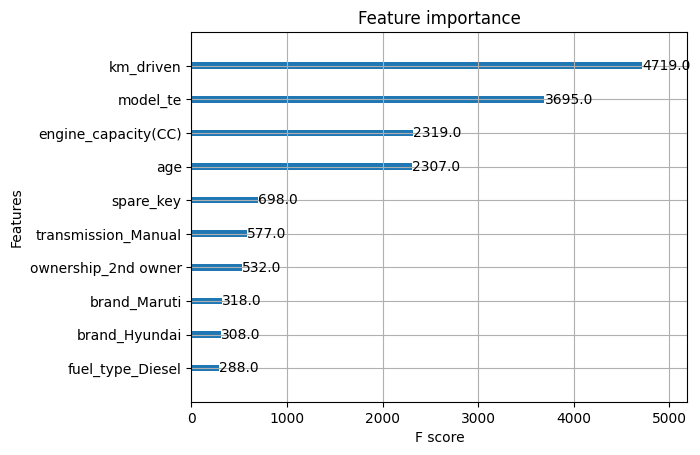

In [142]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_xgb, max_num_features=10)
plt.show()


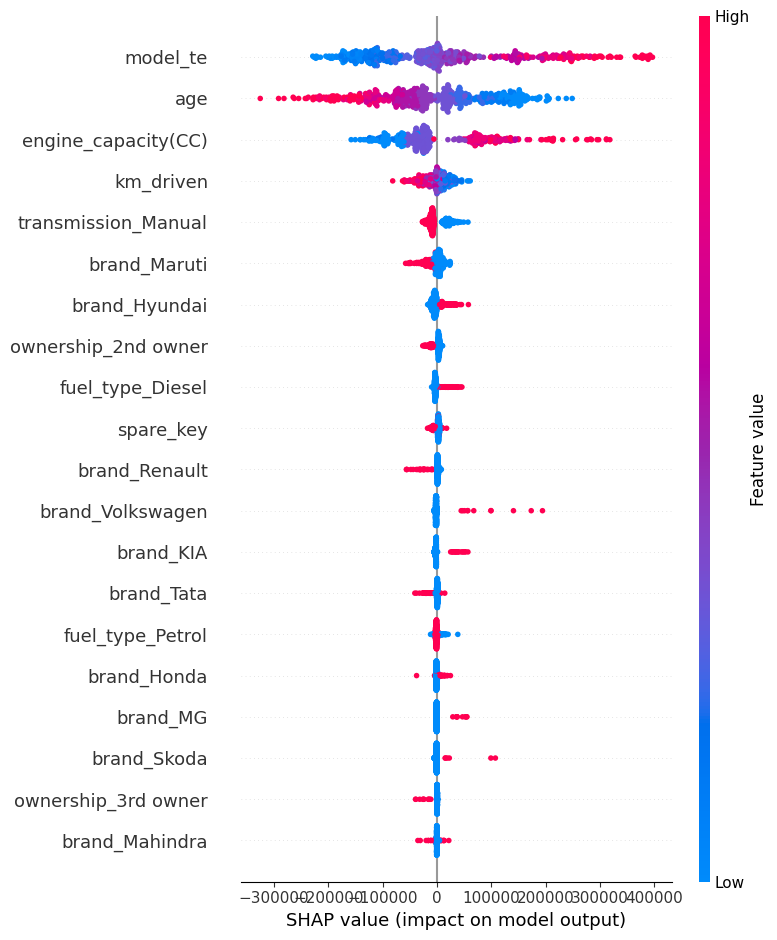

In [143]:
### --- SHAP (for XGBoost) ---
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)